# Problem Statement 
Your task for this homework will be to perform EDA (Exploratory Data Analysis) and predict if a person is prone to a heart attack (0 or 1) 

Question: Is this a classification or regression task and why?

<span style="color: green;">
This is a classification task since we are dealing with two possible outcomes, prone to heart attack and not prone to heart attack people. 

In [1]:
# first lets load the necessary libraries that we'll need for this assignment

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

### Step 1
#### Begin by importing the data and displaying the first 5 observations. 

In [3]:
# lets load the data
heart_df = pd.read_csv('data.csv')

# displaying the first 5 rows
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### **Answer the following using Pandas**

#### How many observations are there in total?

In [5]:
size_df = heart_df.shape[0]
print(f' There are {size_df} observations in total')

 There are 303 observations in total


#### Are there any missing values? 

In [7]:
# method 1: 
print(heart_df.isna().sum())

# # methods 2: 
# print(heart_df.isnull().any())


if not heart_df.isnull().values.any():
    print("No missing data")
else:
    missing_count = heart_df.isnull().sum().sum()
    print(f"There are {missing_count} observations missing")

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
No missing data


**No, there are is not any missing values.**

#### How many **unique** values are in each column?

In [9]:
# number of unique values in each column
# unique_values = heart_df.nunique()
# print(unique_values)

# display purposes
for col in heart_df.columns:
    unique_count = heart_df[col].nunique()
    print(f"In column {col} there are {unique_count} unique values.")

In column age there are 41 unique values.
In column sex there are 2 unique values.
In column cp there are 4 unique values.
In column trtbps there are 49 unique values.
In column chol there are 152 unique values.
In column fbs there are 2 unique values.
In column restecg there are 3 unique values.
In column thalachh there are 91 unique values.
In column exng there are 2 unique values.
In column oldpeak there are 40 unique values.
In column slp there are 3 unique values.
In column caa there are 5 unique values.
In column thall there are 4 unique values.
In column output there are 2 unique values.


#### Which columns will you treat as categorical, which will you take as continuous, and why?

In [11]:
print(heart_df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


<span style="color: green;">
    
**I will treat columns 'sex', 'cp', 'restecg', 'exng', and 'output'as categorical because these values are either 'female' or 'male', 'yes' or 'no' thus these columns can be treated as categorical  type. <br>
The rest I will treat as continous because they represent measurements or quantity of some observation.**

### Step 2

Create a plot of your target variable on the x-axis and counts on the y-axis.Create a plot of your target variable on the x-axis and counts on the y-axis.

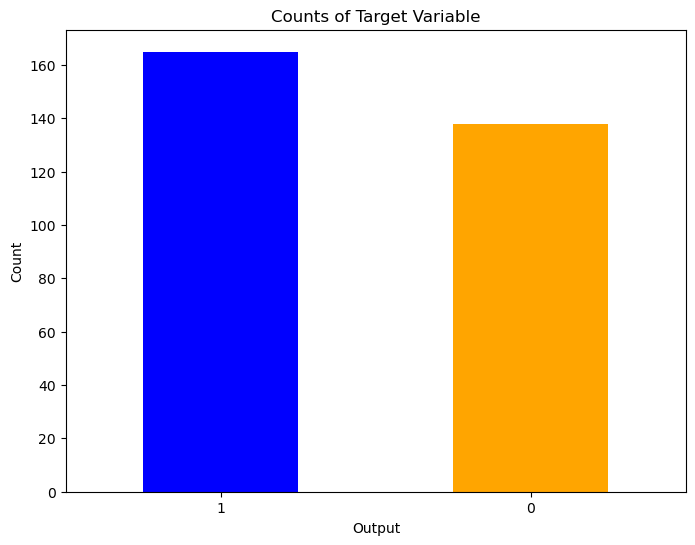

In [19]:
# Plot the counts of the target variable
plt.figure(figsize=(8, 6))
target_var = heart_df['output']

# ploting target variables 
target_var.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Output') # x-axis
plt.ylabel('Count') # y-axis 
plt.title('Counts of Target Variable')
plt.xticks(rotation=0)
plt.show()

#### Question: Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not.

<span style="color: green;">

**The dataset seem to be balanced because there seem to be equal parts of people who are prone to heart attacks and the other portion that are not prone to them.**

#### Question: Is working with a balanced dataset important? Why or why not?

#### Question: How can we deal with an imbalanced dataset?

### Step 3

Create a count plot for each of your categorical variables. That is, the variable on the x-axis andcounts on the y-axis. Here’s an example of sex and slp:

#### Question: What can you conclude from the plots you created? Are there any interesting findings?

### Step 4

Create box plots by outcome for each of your continuous variables. Here’s an example of age
and chol:

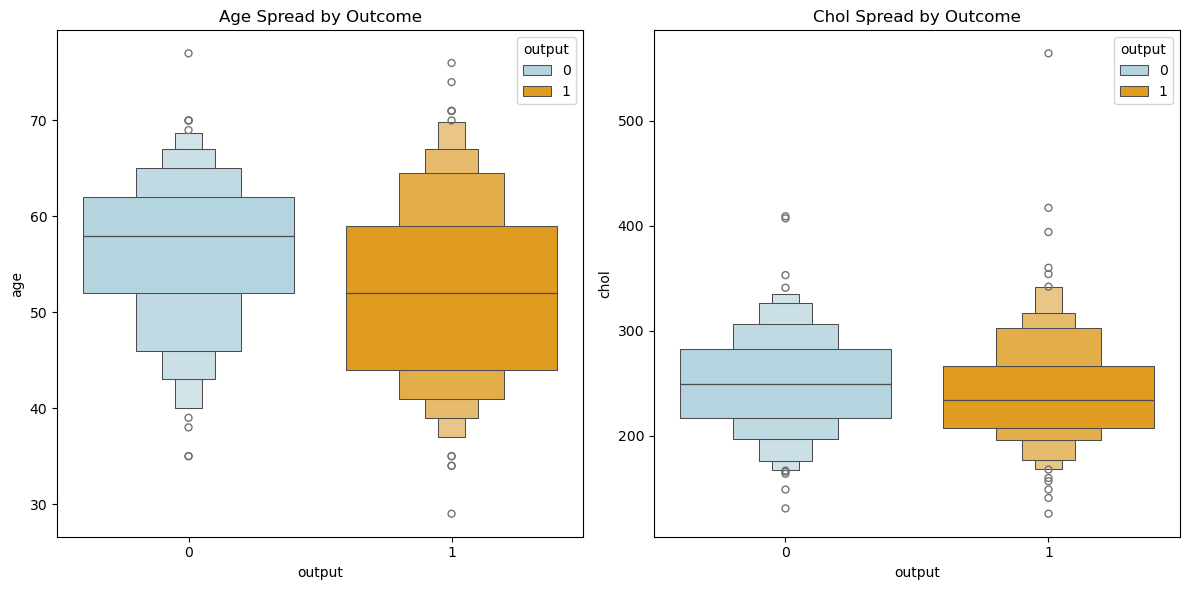

In [144]:
# Set up the matplotlib figure (Letter-Value Box Plot)
plt.figure(figsize=(12, 6))

# color pallete 
color_palette = ['lightblue', 'orange']

# Plot letter value (boxen) plot for 'age' by 'output'
plt.subplot(1, 2, 1)
sb.boxenplot(x='output', y='age', hue = 'output', data=heart_df, palette = color_palette)
plt.title('Age Spread by Outcome')

# Plot letter value (boxen) plot for 'chol' by 'output'
plt.subplot(1, 2, 2)
sb.boxenplot(x='output', y='chol', hue = 'output', data=heart_df, palette = color_palette)
plt.title('Chol Spread by Outcome')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Question: What can you conclude from the plots you created? Are there any interesting findings?

### Step 5

Create distribution plots by outcome for each of your continuous variables. Here’s an example
of trtbps and cp:

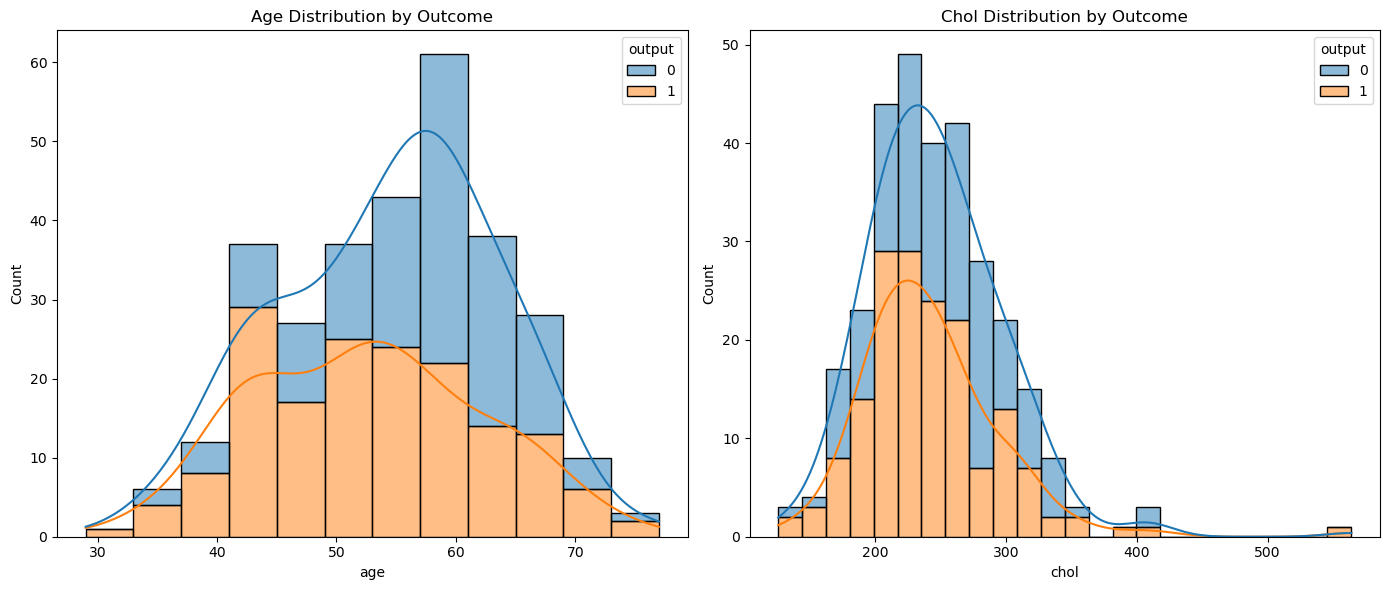

In [148]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot distribution plot for 'age' by 'output'
plt.subplot(1, 2, 1)
sb.histplot(data=heart_df, x='age', hue='output', kde=True, multiple="stack")
plt.title('Age Distribution by Outcome')

# Plot distribution plot for 'chol' by 'output'
plt.subplot(1, 2, 2)
sb.histplot(data=heart_df, x='chol', hue='output', kde=True, multiple="stack")
plt.title('Chol Distribution by Outcome')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Question: What can you conclude from the plots you created? Are there any interesting findings?

### Step 6 

Create a heatmap of your data. Here’s an example:

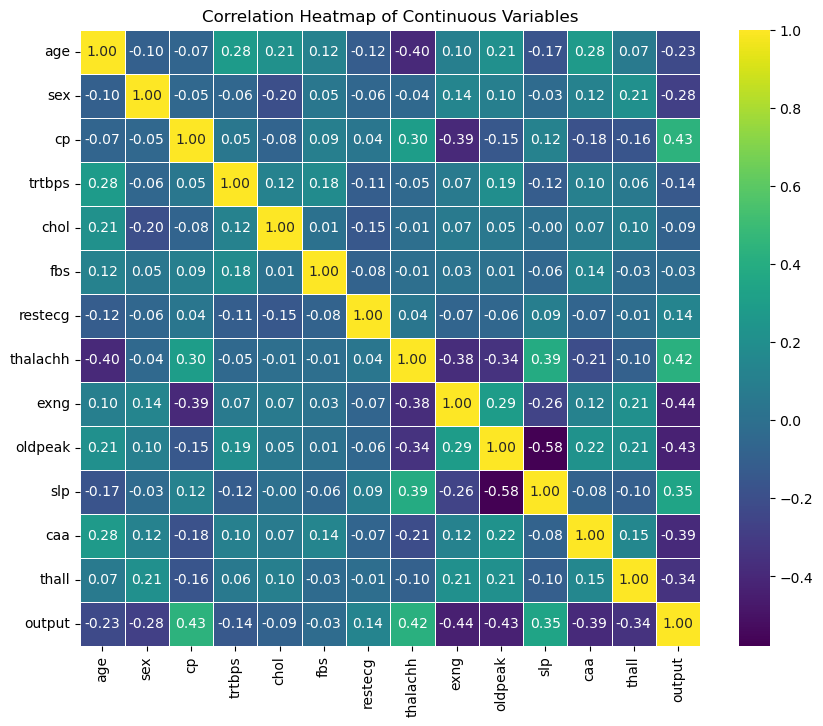

In [162]:
# Compute the correlation matrix
corr_matrix = heart_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Continuous Variables')

# Show plot
plt.show()

#### Question: What can you conclude from the heatmap you created? Are there any interesting findings? 

### Step 7

Explore the data a bit on your own and include a few additional graphs of your choice. For
example, here’s a line plot of cp vs. age:

#### Question: What can you conclude from the plots that you created? Did you find anything interesting?

### Step 8

#### Question: Name two different models that you can use to solve the problem statement.

 #### Question: What is the difference between label encoding and one hot encoding, and when should you use one over the other?

#### Question: What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data?

#### Question: Why is scaling data important?

#### Question: For the two different models that you named earlier, are they using a parametric or non- parametric learning algorithms? What’s the difference?

#### Question: Suppose that we had missing values in our dataset. What are different ways we could handle them?

### Step 9

Choose 2 different models to solve the problem statement. Apply any necessary encoding,
scaling, and train test splits to your data and construct the 2 models you selected. Provide
a classification report and confusion matrix for both models. 

#### Do the following 
##### Write a conclusion (~1 paragraph) detailing the main points you discovered while exploring the data. Also include things like: Did you scale your data? If so, which scaling method did you use and why? Is there a specific reason you selected these 2 models? How did the 2 models compare against each other? 

Note: Be sure to use cross validation when comparing models. See sklearn’s
cross_val_score if you’re stuck.